# Crop and Align

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CardAlignment:
    def __init__(self, visualization=False):
        self.visualization_mode = visualization

    def crop_card(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        max_contour = max(contours, key=cv2.contourArea)
        rect = cv2.minAreaRect(max_contour)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        card = image.copy()
        cv2.drawContours(card, [box], 0, (0, 255, 0), 2)
        (x, y, w, h) = cv2.boundingRect(box)
        card = card[y:y+h, x:x+w]
        return card, rect

    def align_card(self, card, rect_angle):
       height, width = card.shape[:2]
       if rect_angle < -45:
         rect_angle += 90
       elif rect_angle > 45:
         rect_angle -= 90
       rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rect_angle, 1)
       aligned_card = cv2.warpAffine(card, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)
       return aligned_card

In [3]:
# Function to print the image
def plot_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')
    plt.show()

In [4]:
def process_image(image):
    card_aligner = CardAlignment(visualization=True)
    card, rect = card_aligner.crop_card(image)
    rect_angle = rect[-1]
    aligned_card = card_aligner.align_card(card, rect_angle)

    # Check if additional cropping is required
    gray_aligned = cv2.cvtColor(aligned_card, cv2.COLOR_BGR2GRAY)
    _, thresh_aligned = cv2.threshold(gray_aligned, 1, 255, cv2.THRESH_BINARY)
    contours_aligned, _ = cv2.findContours(thresh_aligned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour_aligned = max(contours_aligned, key=cv2.contourArea)
    rect_aligned = cv2.minAreaRect(max_contour_aligned)
    box_aligned = cv2.boxPoints(rect_aligned)
    box_aligned = np.intp(box_aligned)

    # Calculate bounding box
    (x, y, w, h) = cv2.boundingRect(box_aligned)

    # Apply additional cropping if required
    if x > 0 or y > 0 or x + w < aligned_card.shape[1] or y + h < aligned_card.shape[0]:
        aligned_card = aligned_card[y:y+h, x:x+w]

    plot_image(aligned_card)
    return aligned_card


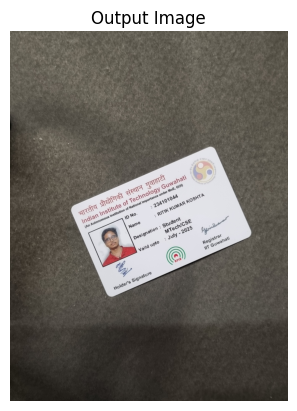

In [8]:
# Path to the image file
original_image = cv2.imread(r"E:\IPML\train_data\images\train\20240412_230231.jpg")
plot_image(original_image)

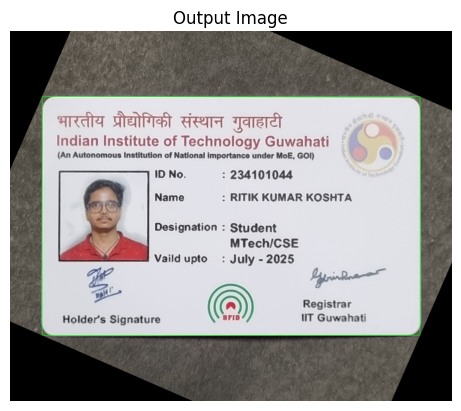

In [9]:
# Process the image
aligned_image = process_image(original_image)

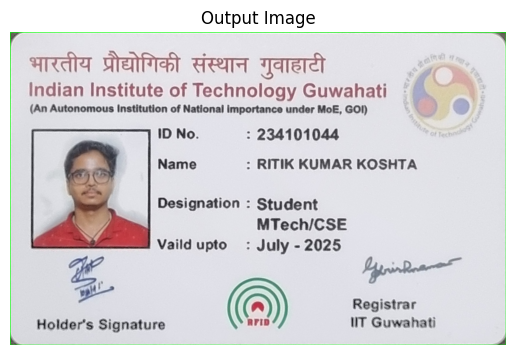

In [10]:
# Process the image
aligned_image1 = process_image(aligned_image)

# Next Phase
**After Cropping Module**